<a href="https://colab.research.google.com/github/mgoetze06/fotobooth/blob/main/fotobox-cvml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import cv2
#from skimage import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#convert to script:
#jupyter nbconvert --to script *.ipynb

**Face Frontal Classifier**

In [156]:
#face_cas = cv2.CascadeClassifier('../env/lib/python3.10/site-packages/cv2/data/haarcascade_frontalface_alt2.xml')
face_cas = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


(697, 1000, 3)
(697, 1000, 3)


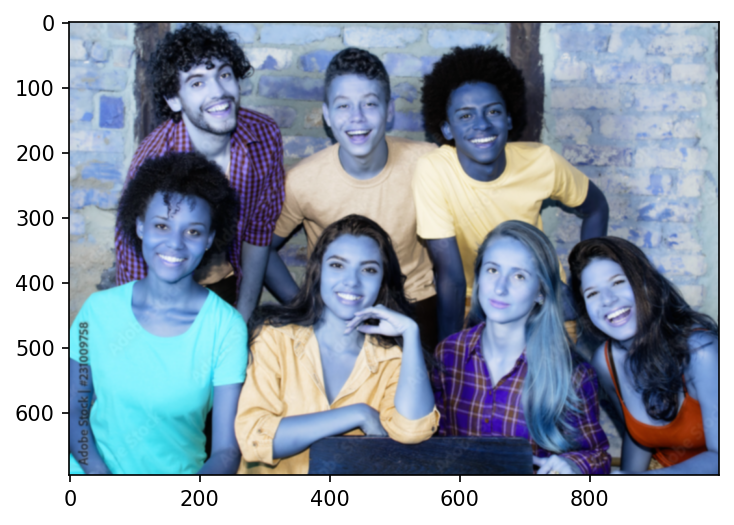

In [172]:
#cap = cv2.VideoCapture(0)
#img = cv2.imread('/content/drive/MyDrive/test.JPG', cv2.IMREAD_GRAYSCALE)
#org_img = cv2.imread('/content/drive/MyDrive/test.JPG')
org_img = cv2.imread('/content/drive/MyDrive/cvml-emb/test_gruppe.jpg')
h_org,w_org,temp = org_img.shape
print(org_img.shape)
reduce_factor = 1
img = cv2.resize(org_img, (int(w_org/reduce_factor), int(h_org/reduce_factor)))
img = cv2.GaussianBlur(img, (5,5), 0)
#img = cv2.imread('/path_to_image/opencv-logo.png', 0) 
#cv2.imshow('image',img) not available in jupyter
#plt.imshow(img, cmap='gray')
plt.figure(figsize=(6, 4), dpi=150)
plt.imshow(img)
print(img.shape)

In [173]:
#success, img = cap.read()
im_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#face_boxes = face_cas.detectMultiScale(im_gray, scaleFactor=1.05, minNeighbors=9)
#face_boxes,rejectLevels, levelWeights = face_cas.detectMultiScale3(im_gray, scaleFactor=1.05, minNeighbors=9, outputRejectLevels=True)
#face_boxes,rejectLevels, levelWeights = face_cas.detectMultiScale3(im_gray, scaleFactor=1.2, minNeighbors=9, outputRejectLevels=True)
#face_boxes,rejectLevels, levelWeights = face_cas.detectMultiScale3(im_gray, scaleFactor=1.15, minNeighbors=20, outputRejectLevels=True)
face_boxes,rejectLevels, levelWeights = face_cas.detectMultiScale3(im_gray, scaleFactor=1.01, minNeighbors=15, outputRejectLevels=True)
print(face_boxes)
print(rejectLevels)
print(levelWeights)

[[487  97  59  59]
 [389  87 107 107]
 [162  43 121 121]
 [580  98 106 106]
 [844 136 139 139]
 [103 272 124 124]
 [375 332 120 120]
 [616 343 114 114]
 [774 370 105 105]
 [543 517  62  62]
 [  5 556  37  37]
 [246 566  91  91]
 [ 12 620  27  27]]
[[25]
 [25]
 [25]
 [25]
 [25]
 [25]
 [25]
 [25]
 [25]
 [25]
 [25]
 [25]
 [25]]
[[4.602551  ]
 [9.97627006]
 [6.40328916]
 [9.22804703]
 [2.23018699]
 [8.77658913]
 [9.12015809]
 [9.26461296]
 [6.37955705]
 [1.53554806]
 [4.59980297]
 [4.95462798]
 [4.33871915]]


True

<Figure size 432x288 with 0 Axes>

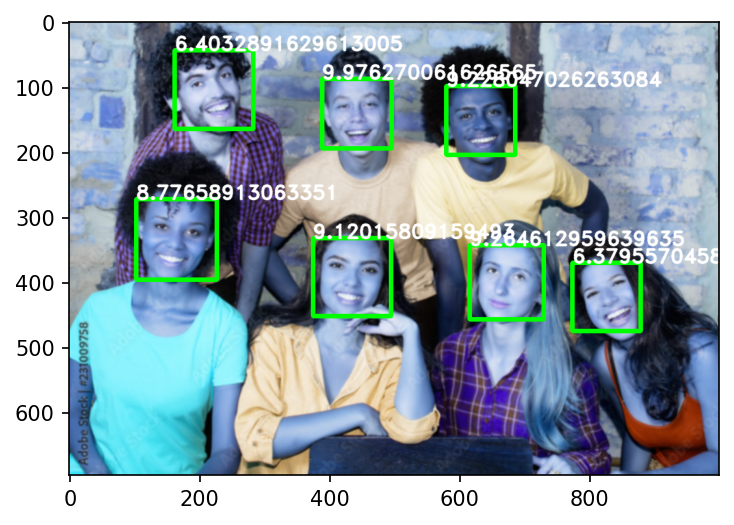

In [174]:
score_val = 5
i = 0
plt.clf()
faces = 0
for (x, y, w, h) in face_boxes:
  if (levelWeights[i]>score_val):
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 5)
    #cv2.rectangle(org_img,(int(x*reduce_factor), int(y*reduce_factor)),(int(x*reduce_factor + w*reduce_factor), int(y*reduce_factor + h*reduce_factor)), (0, 255, 0), 5)
    cv2.putText(img,str(levelWeights[i][0]),(x,y),2,1,(255,255,255),2,cv2.LINE_AA)
    faces = faces + 1
  i = i + 1
plt.figure(figsize=(6, 4), dpi=150)
plt.imshow(img, cmap='gray')
cv2.imwrite("face_detected.jpg", img)


#plt.savefig('test_detected.jpg')
#cv2.imshow('Output', img)
#cap.release()
#cv2.destroyAllWindows()

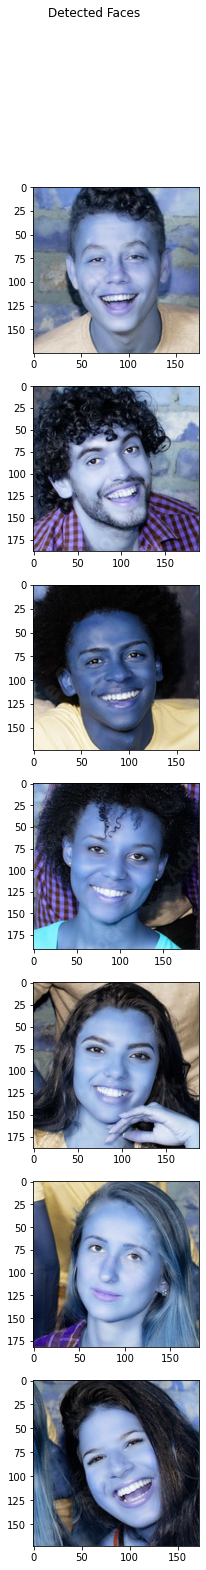

In [176]:
i = 0
#plt.figure(figsize=(4, 8), dpi=150)
fig,axs = plt.subplots(faces,figsize=(25,25))
axs_index = 0
fig.suptitle('Detected Faces')
for face_box in face_boxes:
  if (levelWeights[i]>score_val):
    x, y, w_box, h_box = face_box*reduce_factor
    #h_org of original image
    #w_org of original image
    #print(x, y, w_box, h_box)
    crop_padding = int(h_org/20) #crop border is 1/15 of the orig. image height
    x = x - crop_padding
    y = y - crop_padding
    if x <= 0:
      x = 0
    if y <= 0:
      y = 0

    #create size of face box with padding
    w_box = w_box + 2*crop_padding
    h_box = h_box + 2*crop_padding

    #if face is near edge --> cropped image is moved from edge away
    if (x + w_box) >= w_org:
      x = w_org - w_box
    if (y + h_box) >= h_org:
      y = h_org - h_box

    #print(x, y, w_box, h_box)
    cropped_img = org_img[y:y+h_box, x:x+w_box]

    #plt.imshow(cropped_img)
    axs[axs_index].imshow(cropped_img)
    filename = "face%s.jpg"%axs_index
    cv2.imwrite(filename, cropped_img)
    axs_index = axs_index+1
  i = i+1


**Smile Classifier**

In [77]:
#smile_cas = cv2.CascadeClassifier('../env/lib/python3.10/site-packages/cv2/data/haarcascade_smile.xml')
smile_cas = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

In [103]:
img = cv2.imread('face0.jpg')

In [104]:
#success, img = cap.read()
im_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
smile_boxes,rejectLevels, levelWeights = smile_cas.detectMultiScale3(im_gray, scaleFactor=1.05, minNeighbors=40, outputRejectLevels=True)
if (len(smile_boxes)<1):
  print("why no smile?")
else:
  print(smile_boxes)
  print(rejectLevels)
  print(levelWeights)


[[53 93 74 37]]
[[20]]
[[4.74297342]]


In [105]:
for (x, y, w, h) in smile_boxes:
  cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 5)

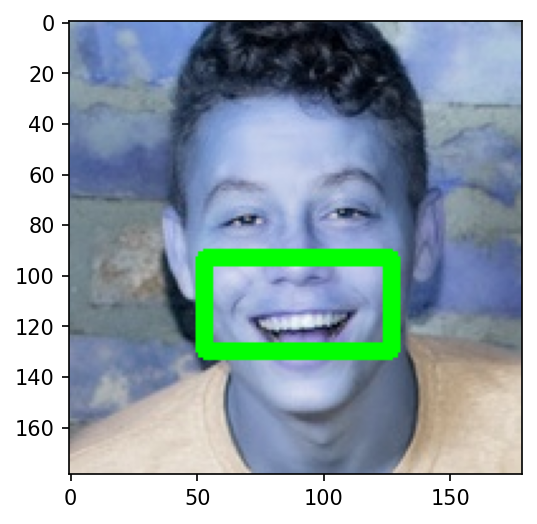

In [106]:
plt.figure(figsize=(6, 4), dpi=150)
plt.imshow(img, cmap='gray')